# pandas exercises

We'll use the sample datset from the Social Secury Administration on baby names:
https://www.ssa.gov/oact/babynames/limits.html

Download the "National" version and unzip it.  There will be one file for each year.

This example follows the _Python for Data Analysis_ book closely

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's start by reading in just a single dataset, for the first year available (1880).  We give the names of the colums here.  The index will just be the line / record number in the file (not really important for us)

In [12]:
names_1976 = pd.read_csv('names/yob1976.txt', names=["name", "sex", "births"])
names_1976

,name,sex,births
0,Jennifer,F,59475
1,Amy,F,31340
2,Melissa,F,25096
3,Heather,F,24192
4,Angela,F,22040
5,Michelle,F,19553
6,Kimberly,F,18965
7,Jessica,F,18370
8,Lisa,F,17349
9,Amanda,F,15589


## number of births

Now we want to start doing some analysis.  `.groupby()` creates a new type of container that groups items.  Here, we'll group by sex.

See this:
http://pandas.pydata.org/pandas-docs/stable/groupby.html
https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/

for a nice explanation of this method.

In [13]:
names_1976.groupby("sex")["births"].sum()

sex
F    1465129
M    1569794
Name: births, dtype: int64

Note that we can use a column name as a parameter of the object, so we can equivalently do this as:

In [14]:
names_1976.groupby("sex").births.sum()

sex
F    1465129
M    1569794
Name: births, dtype: int64

On its own, you can't print a `GroupBy` object.  You need to do a transformation or filter on it to get back a `Series` or `DataFrame`.

In [16]:
gb = names_1976.groupby("sex")
gb.count()

,name,births
sex,,
F,10904,10904
M,6491,6491


As we saw in the intro, we can propagate a scalar to all indices in the `DataFrame`.  We'll use this to add a new column that represents the year:

In [19]:
names_1976["year"] = 1976
names_1976

,name,sex,births,year
0,Jennifer,F,59475,1976
1,Amy,F,31340,1976
2,Melissa,F,25096,1976
3,Heather,F,24192,1976
4,Angela,F,22040,1976
5,Michelle,F,19553,1976
6,Kimberly,F,18965,1976
7,Jessica,F,18370,1976
8,Lisa,F,17349,1976
9,Amanda,F,15589,1976


## all data sets

Now we can read in all of the datasets.  We will read them in one-by-one and add the "year" column to them.  We'll keep a list of all the `DataFrame`s and then we'll use a pandas method to transform this list of `DataFrame`s into a single `DataFrame`

In [21]:
years = range(1880, 2019)

pieces = []
columns = ["name", "sex", "births"]

for yr in years:
    frame = pd.read_csv("names/yob{}.txt".format(yr), names=columns)
    
    # this creates a new column and gives all rows the same value -- the year
    frame["year"] = yr
    pieces.append(frame)

# create a single dataframe through concatenation -- ignore_index means that
# we don't care about the original line numbers
names = pd.concat(pieces, ignore_index=True)

In [31]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


## pivot tables

a _pivot table_ creates a new dataframe from our orignal one, usually summarizing the data in a new way.  In particular, with a pivot table, we can create a new index and columns, with the data in the `DataFrame` reduced via some operation across another column.

Here, the column that we are going to aggregrate is "births", and the function will will use for the aggregating is `sum` (to sum over the names).

In [36]:
names.sample(10)

,name,sex,births,year
1154016,Laria,F,9,1993
1864465,Sammi,F,26,2016
729065,Ashaki,F,31,1972
248774,Ayleen,F,6,1927
1536678,Brendolyn,F,5,2006
1389188,Jevaun,M,7,2001
1029648,Rubie,F,13,1988
8440,Catharine,F,42,1884
343006,Jearldean,F,7,1937
1203940,Callee,F,12,1995


In [22]:
total_births = names.pivot_table("births", index="year", columns="sex", aggfunc=sum)

In [23]:
total_births

sex,F,M
year,,
1880,90994,110490
1881,91953,100743
1882,107847,113686
1883,112319,104625
1884,129019,114442
1885,133055,107799
1886,144533,110784
1887,145982,101412
1888,178622,120851


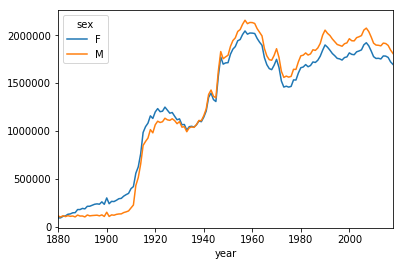

In [24]:
total_births.plot()

## `.apply()` and new columns

Now we'll use `.groupby()` again to allow use to derive a new column -- the fraction of the births with the name specified by the index.  

`apply()` uses what Pandas calls the _split-apply-combine_ rules, e.g., it splits the data into groups, applies your function, and then intelligently concatenates it back together.  Here, the result will be a `DataFrame` with the original information and this new column.

In [25]:
def add_prop(group):
    group["prop"] = group["births"]/group["births"].sum()
    return group

names = names.groupby(["year", "sex"]).apply(add_prop)

In [14]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


## Q1: Sanity check

Verify that within each of the groups we just used above that the "prop" column sums to 1 (it should be close, to roundoff).  The `np.allclose()` function might be useful here.

In [28]:
check = names.groupby(["year", "sex"])["prop"].sum()
np.allclose(check, 1.0)

True

Now we will group by "year" and "sex" and then sort by births to get just the top N most popular names.

Notice that we simply append any additional arguments to our apply function after the function name (this is an example of the `**kwargs` behavior in python

In [29]:
def get_top(group, N=1000):
    return group.sort_values(by="births", ascending=False)[:N]

grouped = names.groupby(["year", "sex"])
top = grouped.apply(get_top, 1000)

In [43]:
top.columns

Index(['name', 'sex', 'births', 'year', 'prop'], dtype='object')

## Q2: split by sex

create two new dataframes, one `boys` with just those in `top` that are "M" and one `girls` with those in `top` who are "F"

In [46]:
girls = top[top.sex=="F"]
boys = top[top.sex=="M"]

We do not need the year or sex columns anymore, we can delete them

In [48]:
del girls["year"]
del boys["year"]
del girls["sex"]
del boys["sex"]

## More analysis

How many times does each name appear, by year?  This dataframe is the total number of births by year and name

In [50]:
#total_births = top.pivot_table("births", index="year", columns="name", aggfunc=sum)
# Albert
del top['year'] # Need to delete, since 'year' being both index and column label raises ambiguity error
total_births = top.pivot_table("births", index="year", columns="name", aggfunc=sum)

In [19]:
total_births

name,Aaden,Aaliyah,Aanya,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [51]:
total_births["John"]

year
1880     9701.0
1881     8795.0
1882     9597.0
1883     8934.0
1884     9428.0
1885     8801.0
1886     9074.0
1887     8166.0
1888     9299.0
1889     8600.0
1890     8558.0
1891     7724.0
1892     9093.0
1893     8110.0
1894     8298.0
1895     8381.0
1896     8188.0
1897     7596.0
1898     8214.0
1899     7030.0
1900     9875.0
1901     6939.0
1902     7945.0
1903     7649.0
1904     8148.0
1905     8102.0
1906     8307.0
1907     9048.0
1908     9400.0
1909     9658.0
         ...   
1989    29852.0
1990    29080.0
1991    27799.0
1992    26247.0
1993    24991.0
1994    24179.0
1995    23242.0
1996    22182.0
1997    21385.0
1998    20630.0
1999    20350.0
2000    20100.0
2001    18893.0
2002    17459.0
2003    17236.0
2004    16452.0
2005    15771.0
2006    15168.0
2007    14433.0
2008    13322.0
2009    12121.0
2010    11560.0
2011    11058.0
2012    10625.0
2013    10716.0
2014    10693.0
2015    10396.0
2016    10032.0
2017     9499.0
2018     9163.0
Name: John, Length:

We can see that this matches what we had in our previous data frame

In [52]:
top[top.name=="John"]

name sex  births      prop
year sex                                    
1880 F   228      John   F      46  0.000506
     M   942      John   M    9655  0.087383
1881 F   2312     John   F      26  0.000283
     M   2938     John   M    8769  0.087043
1882 F   4212     John   F      40  0.000371
     M   4963     John   M    9557  0.084065
1883 F   6340     John   F      40  0.000356
     M   7116     John   M    8894  0.085008
1884 F   8454     John   F      40  0.000310
     M   9318     John   M    9388  0.082033
1885 F   10739    John   F      45  0.000338
     M   11640    John   M    8756  0.081225
1886 F   13036    John   F      48  0.000332
     M   14019    John   M    9026  0.081474
1887 F   15414    John   F      56  0.000384
     M   16435    John   M    8110  0.079971
1888 F   17834    John   F      52  0.000291
     M   18976    John   M    9247  0.076516
1889 F   20498    John   F      52  0.000292
     M   21632    John   M    8548  0.077302
1890 F   23086    John   F      56  0.000294
     M   24277    John   M    8502  0.076577
1891 F   25816    John   F      44  0.000237
     M   26971    John   M    7680  0.075896
1892 F   28460    John   F      54  0.000254
     M   29759    John   M    9039  0.074069
1893 F   31361    John   F      61  0.000287
     M   32671    John   M    8049  0.071662
1894 F   34211    John   F      60  0.000269
     M   35552    John   M    8238  0.071159
...                ...  ..     ...       ...
1989 M   1060544  John   M   29852  0.014922
1990 M   1085004  John   M   29080  0.014162
1991 M   1109952  John   M   27799  0.013762
1992 M   1135214  John   M   26247  0.013144
1993 M   1160829  John   M   24991  0.012745
1994 M   1186748  John   M   24179  0.012518
1995 M   1212743  John   M   23242  0.012211
1996 M   1238963  John   M   22182  0.011712
1997 M   1265655  John   M   21385  0.011346
1998 M   1293065  John   M   20630  0.010795
1999 M   1321315  John   M   20350  0.010601
2000 M   1350582  John   M   20100  0.010237
2001 M   1380674  John   M   18893  0.009727
2002 M   1411061  John   M   17459  0.008996
2003 M   1441979  John   M   17236  0.008729
2004 M   1473564  John   M   16452  0.008292
2005 M   1505970  John   M   15771  0.007900
2006 M   1539391  John   M   15168  0.007384
2007 M   1574000  John   M   14433  0.006959
2008 M   1608860  John   M   13322  0.006535
2009 M   1643670  John   M   12121  0.006116
2010 M   1678019  John   M   11560  0.006030
2011 M   1711851  John   M   11058  0.005829
2012 M   1745713  John   M   10625  0.005608
2013 M   1779206  John   M   10716  0.005673
2014 M   1812456  John   M   10693  0.005576
2015 M   1845614  John   M   10396  0.005434
2016 M   1878502  John   M   10032  0.005298
2017 M   1911082  John   M    9499  0.005147
2018 M   1943410  John   M    9163  0.005065

[248 rows x 4 columns]

Which names are the most popular of all time?

In [53]:
a = total_births.sum()
a.sort_values(ascending=False)

name
James          5186545.0
John           5145770.0
Robert         4839543.0
Michael        4382255.0
Mary           4139659.0
William        4132376.0
David          3632581.0
Joseph         2621545.0
Richard        2572567.0
Charles        2403192.0
Thomas         2317123.0
Christopher    2036782.0
Daniel         1922881.0
Elizabeth      1640920.0
Matthew        1604013.0
Patricia       1575894.0
George         1475049.0
Jennifer       1470667.0
Linda          1455760.0
Anthony        1444646.0
Barbara        1437764.0
Donald         1414057.0
Paul           1390660.0
Mark           1353546.0
Edward         1293313.0
Andrew         1292819.0
Steven         1283167.0
Kenneth        1275530.0
Margaret       1251556.0
Joshua         1213132.0
                 ...    
Rastus               5.0
Cappie               5.0
Manervia             5.0
Patricio             5.0
Bluford              5.0
Mance                5.0
Loda                 5.0
Lofton               5.0
Man                 

Let's plot naming trends, for a few of the most popular names

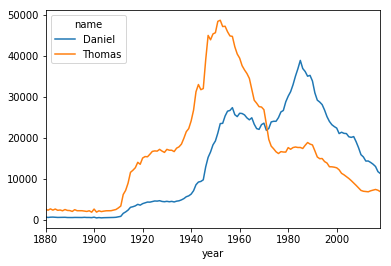

In [67]:
subset = total_births[["Daniel", "Thomas"]]
subset.plot()

# Exercises

## Q3: unique names

how many unique names appear in our top 1000 list?  Use the `.unique()` method on the "name" `Series` to get a an array (it will actually be a NumPy `ndarray` of objects)

In [71]:
topnames = top.name
topnames
#unique_names = topnames.unique()
#num_unique = len(unique_names)
#print("There are {} unique names.".format(num_unique))

year  sex         
1880  F    0               Mary
           1               Anna
           2               Emma
           3          Elizabeth
           4             Minnie
           5           Margaret
           6                Ida
           7              Alice
           8             Bertha
           9              Sarah
           10             Annie
           11             Clara
           12              Ella
           13          Florence
           14              Cora
           15            Martha
           16             Laura
           17            Nellie
           18             Grace
           19            Carrie
           20             Maude
           21             Mabel
           22            Bessie
           23            Jennie
           24          Gertrude
           25             Julia
           26            Hattie
           27             Edith
           28            Mattie
           29              Rose
                     

## Q4: gender neutral names

What are all the names that appear for both boys and girls?

## Q5: name diversity

We want to make a plot of how many names it takes to reach 50% of the births in a given year.  Let's start with the boys names:

In [24]:
boys = top[top.sex == "M"]

Now, to understand the process, let's work just on a particular year, 2015

In [25]:
b15 = boys[boys.year == 2015]

In [26]:
b15.info

<bound method DataFrame.info of                        name sex  births  year      prop
year sex                                               
2015 M   1844730       Noah   M   19511  2015  0.010275
         1844731       Liam   M   18281  2015  0.009627
         1844732      Mason   M   16535  2015  0.008708
         1844733      Jacob   M   15816  2015  0.008329
         1844734    William   M   15809  2015  0.008326
         1844735      Ethan   M   14991  2015  0.007895
         1844736      James   M   14705  2015  0.007744
         1844737  Alexander   M   14460  2015  0.007615
         1844738    Michael   M   14321  2015  0.007542
         1844739   Benjamin   M   13608  2015  0.007166
         1844740     Elijah   M   13511  2015  0.007115
         1844741     Daniel   M   13408  2015  0.007061
         1844742      Aiden   M   13378  2015  0.007045
         1844743      Logan   M   12862  2015  0.006774
         1844744    Matthew   M   12648  2015  0.006661
         1844745

We'll use the `cumsum()` property to do a cumulative sum over the `prop` column we added previously

In [27]:
prop_cumsum = b15.sort_values(by="prop", ascending=False)["prop"].cumsum()

and now we can use `searchsorted` to return the position where "if the corresponding elements in v were inserted before the indices, the order of self would be preserved." (see http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.searchsorted.html)

In [28]:
prop_cumsum.searchsorted(0.5)

array([134])

Since we start counting at 0, we add 1 to this to get the number of names needed in this year to reach 50% of births.

Now generalize this to a function that you can use `apply()` on and make a plot of the number of names to reach 50% by year